# Segment and Convert  biosignals
Segment : cut the different acquisitions recorded in the same file (multi-run recordings).

Convert : change the file type (from `.acq` to `.tsv.gz`).


#### Dependencies

In [6]:
import pandas as pd
import numpy as np
import os
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from phys2bids.phys2bids import phys2bids
import pandas as pd

ERROR:duecredit:Module `duecredit` not successfully imported due to "No module named 'duecredit'". Package functionality unaffected.


In [ ]:
subs=['sub-01', 'sub-02','sub-03','sub-04','sub-05','sub-06',]
no_infile = {}
for sub in subs:
    info = pd.read_json(f"/scratch/flesp/physio_data/friends/{sub}/{sub}_volumes_all-ses-runs.json")
    tmp_ses = []
    for ses in info:
        if info[ses]['in_file'] is np.nan:
            tmp_ses.append(ses)
    
    no_infile[sub] = len(tmp_ses)

In [ ]:
no_infile

### homebrewed method

In [ ]:
bio_df, fs = nk.read_acqknowledge('/scratch/flesp/pilot_emotions/sourcedata/physio/sub-01/ses-test/neuromod_video52022-10-18T10_57_22a.acq')

In [ ]:
bio_df.head()

In [11]:
%run /home/francois.lespinasse/cneuromod/ds_prep/physio/draft/convert_seg2hdf.py
%run /home/francois.lespinasse/cneuromod/ds_prep/physio/preproc/neuromod_process.py

In [4]:
volume_counter('/scratch/flesp/pilot_emotions/sourcedata/physio', subject='sub-01')

counting volumes in physio file for: ses-test
neuromod_video52022-10-18T10_57_22a.acq [1.6, 2.635]
[(8212647, 8244665), (9493182, 14517285), (16141967, 16201386), (16673866, 21759520)]
neuromod_video52022-10-18T10_57_22b.acq [1.6, 2.635]
[(3279590, 3311608), (3927368, 8951473), (9505383, 9558102), (10154403, 15240057)]


{'ses-test': [[3, 315, 3, 194], [3, 315, 3, 194]]}

INFO:phys2bids.phys2bids:Currently running phys2bids version 2.6.2
INFO:phys2bids.phys2bids:Input file is /scratch/flesp/pilot_emotions/sourcedata/physio/sub-01/ses-test/neuromod_video52022-10-18T10_57_22a.acq
INFO:phys2bids.phys2bids:Reading the file /scratch/flesp/pilot_emotions/sourcedata/physio/sub-01/ses-test/neuromod_video52022-10-18T10_57_22a.acq
INFO:phys2bids.physio_obj:Trigger channel name is not in our trigger channel name alias list. Please make sure you choose the proper channel.
INFO:phys2bids.phys2bids:Checking that units of measure are BIDS compatible
INFO:phys2bids.phys2bids:Reading infos
INFO:phys2bids.physio_obj:
------------------------------------------------
File /scratch/flesp/pilot_emotions/sourcedata/physio/sub-01/ses-test/neuromod_video52022-10-18T10_57_22a.acq contains:
01. PPG100C; sampled at 10000.0 Hz
02. ECG100C; sampled at 10000.0 Hz
03. Custom, HLT100C - A 5; sampled at 10000.0 Hz
04. DA100C; sampled at 10000.0 Hz
05. EDA100C-MRI; sampled at 10000.0 Hz


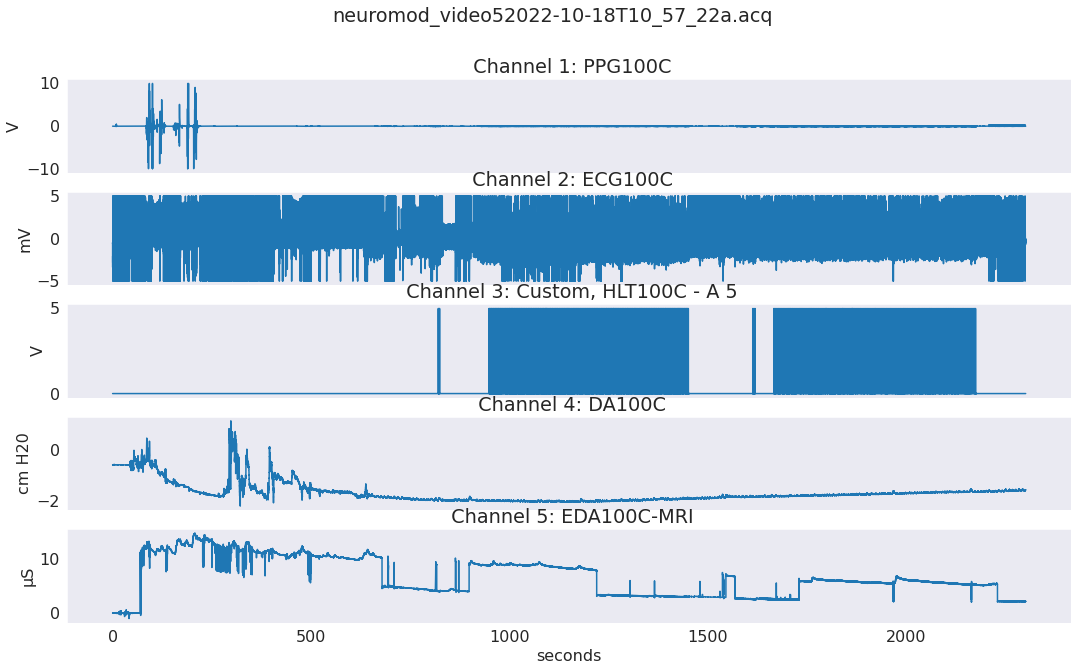

In [12]:
phys2bids('/scratch/flesp/pilot_emotions/sourcedata/physio/sub-01/ses-test/neuromod_video52022-10-18T10_57_22a.acq',num_timepoints_expected=[3, 315, 3, 194], tr=[1.6, 1.6, 2.635, 2.635],chtrig=3,ch_name=["PPG", "ECG", "TTL", "RSP","EDA"], outdir='/home/francois.lespinasse/cneuromod/')